# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from glob import glob

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
(summary_ob_f07, context_ob_f07, model_ob_f07, metric_ob_f07) = pickle.load(open( '19-02-01_results_over_baseline_faces_07.p', "rb"))
(summary_ob_f05, context_ob_f05, model_ob_f05, metric_ob_f05) = pickle.load(open( '19-02-01_results_over_baseline_faces_05.p', "rb"))
(summary_ob_f03, context_ob_f03, model_ob_f03, metric_ob_f03) = pickle.load(open( '19-02-01_results_over_baseline_faces_03.p', "rb"))

## Get the SIM scores

In [8]:
sim_table = summary[:,:,1]
sim_f03_table = summary_f03[:,:,1]
sim_f05_table = summary_f05[:,:,1]
sim_f07_table = summary_f07[:,:,1]

## Change scores into DataFrames

In [9]:
SIM = pd.DataFrame(data=sim_table, columns=model, index=context)
SIM.columns.name='models'
SIM.index.name='context'

SIM = SIM.transpose()
SIM

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.529256,0.504981,0.568607,0.472232,0.535764,0.478441
cas,0.521473,0.496486,0.561978,0.459220,0.525020,0.490274
covsal,0.528376,0.520976,0.540371,0.516241,0.507251,0.502744
gbvs,0.579692,0.547139,0.632463,0.532250,0.586402,0.524310
icf,0.540450,0.520813,0.572283,0.480500,0.534348,0.493894
ik,0.483443,0.458229,0.524316,0.440349,0.498116,0.439303
sun,0.436436,0.400730,0.494317,0.374971,0.449312,0.347440
dg,0.642767,0.630332,0.662924,0.623571,0.637034,0.623714
faces,0.380547,0.381124,0.324046,0.281475,0.410412,0.323161


In [10]:
faces = SIM.loc['faces']
SIM = SIM.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg']]

In [11]:
SIM_f03 = pd.DataFrame(data=sim_f03_table, columns=model_f03, index=context_f03)
SIM_f03.columns.name='models'
SIM_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
SIM_f03 = SIM_f03.rename(index=str, columns=col).transpose()

SIM_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.535489,0.515820,0.567375,0.473084,0.547418,0.482798
cas,0.525728,0.503291,0.562292,0.459744,0.533971,0.493499
covsal,0.540867,0.540492,0.541474,0.519671,0.528012,0.510934
gbvs,0.583638,0.553899,0.631847,0.532606,0.594117,0.527445
icf,0.547291,0.531809,0.572388,0.482032,0.545444,0.500319
ik,0.490019,0.468970,0.524140,0.441561,0.508954,0.445144
sun,0.441578,0.409820,0.493058,0.375098,0.458578,0.350194


In [12]:
SIM_f05 = pd.DataFrame(data=sim_f05_table, columns=model_f05, index=context_f05)
SIM_f05.columns.name='models'
SIM_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
SIM_f05 = SIM_f05.rename(index=str, columns=col).transpose()

SIM_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.542495,0.527066,0.567506,0.475102,0.558768,0.488953
cas,0.530474,0.511503,0.561227,0.461105,0.540870,0.497408
covsal,0.550315,0.555510,0.541893,0.522584,0.543866,0.518601
gbvs,0.588542,0.561783,0.631919,0.533836,0.602438,0.531272
icf,0.552661,0.540406,0.572526,0.483636,0.554154,0.504156
ik,0.496925,0.480040,0.524296,0.443189,0.519886,0.451064
sun,0.448339,0.420649,0.493226,0.376733,0.469726,0.355033


In [13]:
SIM_f07 = pd.DataFrame(data=sim_f07_table, columns=model_f07, index=context_f07)
SIM_f07.columns.name='models'
SIM_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
SIM_f07 = SIM_f07.rename(index=str, columns=col).transpose()

SIM_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.549862,0.539012,0.567449,0.477050,0.569102,0.496495
cas,0.538440,0.524250,0.561443,0.463732,0.553208,0.503983
covsal,0.555271,0.563686,0.541629,0.524548,0.551776,0.524843
gbvs,0.595868,0.573428,0.632245,0.536224,0.614022,0.537579
icf,0.557546,0.548177,0.572734,0.485544,0.562260,0.506198
ik,0.505718,0.494144,0.524479,0.445401,0.532979,0.459770
sun,0.458123,0.436317,0.493472,0.379859,0.485290,0.363897


## Vizualization

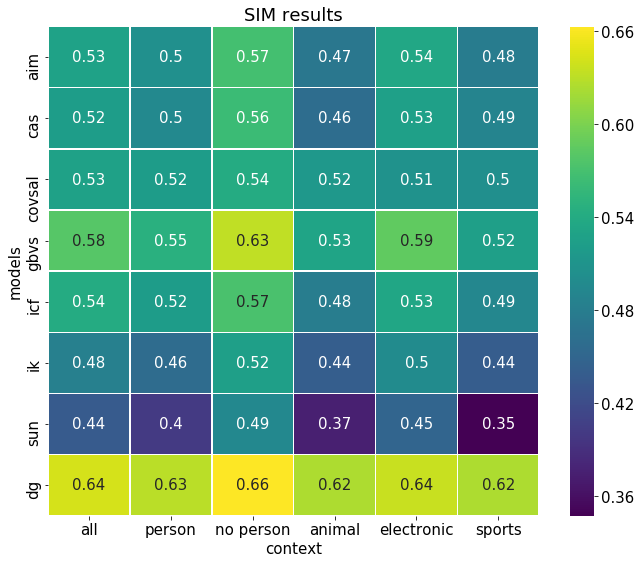

In [14]:
matplotlib.rcParams.update({'font.size': 15})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('SIM results');
plt.savefig('plots/SIM_all.jpg', bbox_inches='tight', pad_inches=0)

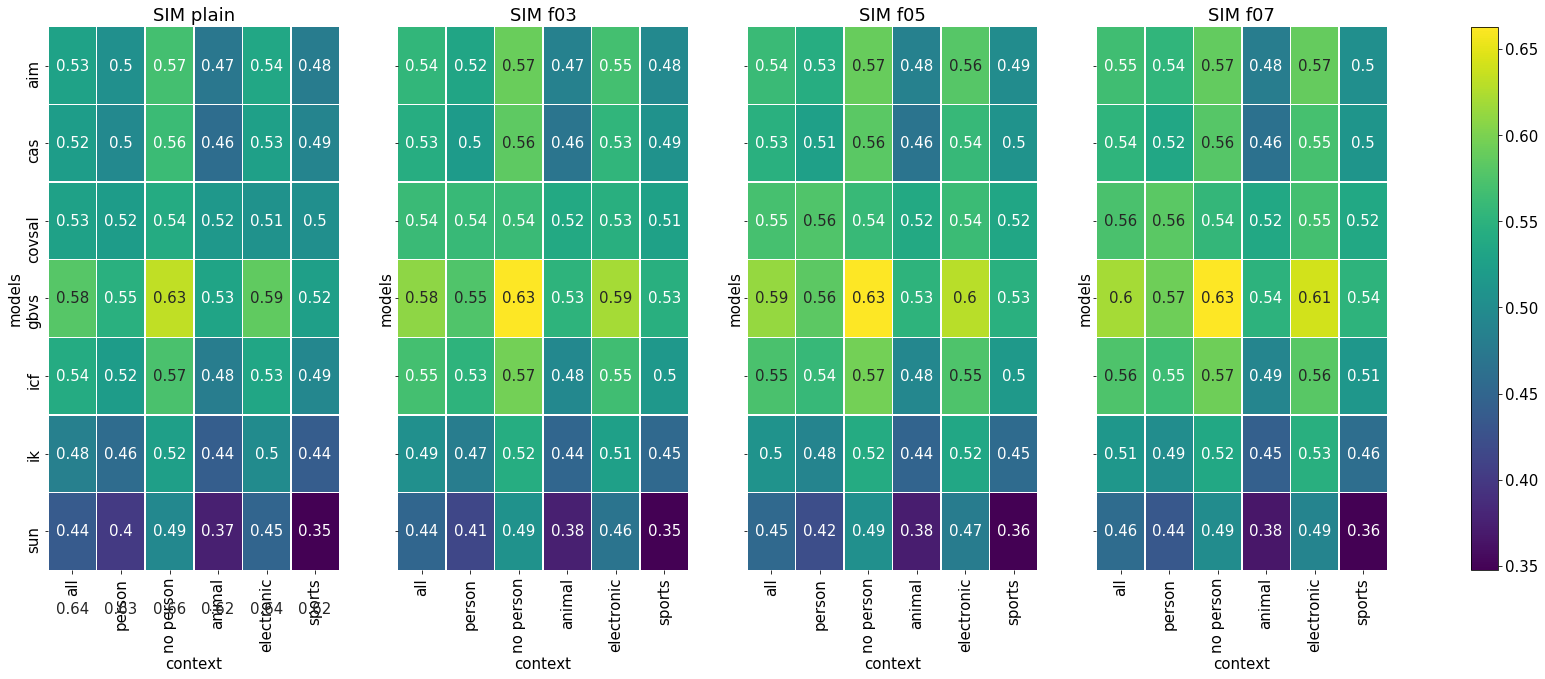

In [15]:
fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(SIM_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(SIM_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(SIM_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('SIM plain');
ax[1].set_title('SIM f03');
ax[2].set_title('SIM f05');
ax[3].set_title('SIM f07');
# plt.savefig('plots/SIM_sep.jpg', bbox_inches='tight', pad_inches=0)

### Calculate the relative error

In [16]:
SIM0 = SIM.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

In [17]:
SIM_diff_f03 = ((SIM_f03 - SIM0) / SIM0)*100
SIM_diff_f05 = ((SIM_f05 - SIM0) / SIM0)*100
SIM_diff_f07 = ((SIM_f07 - SIM0) / SIM0)*100

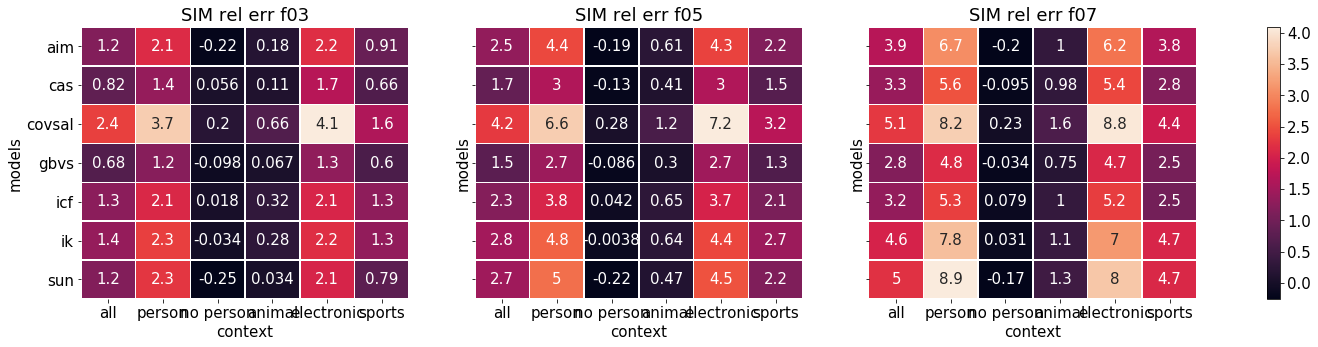

In [18]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(SIM_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(SIM_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(SIM_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('SIM rel err f03');
ax[1].set_title('SIM rel err f05');
ax[2].set_title('SIM rel err f07');
# plt.savefig('plots/SIM_sep_diff.jpg', bbox_inches='tight', pad_inches=0)

### "Zoom in"

In [19]:
aim_sim_f03 = SIM_diff_f03.transpose()['aim']
aim_sim_f05 = SIM_diff_f05.transpose()['aim']
aim_sim_f07 = SIM_diff_f07.transpose()['aim']

In [20]:
df = pd.DataFrame([aim_sim_f03, aim_sim_f05, aim_sim_f07], index=[3,5,7])
df = df.transpose()

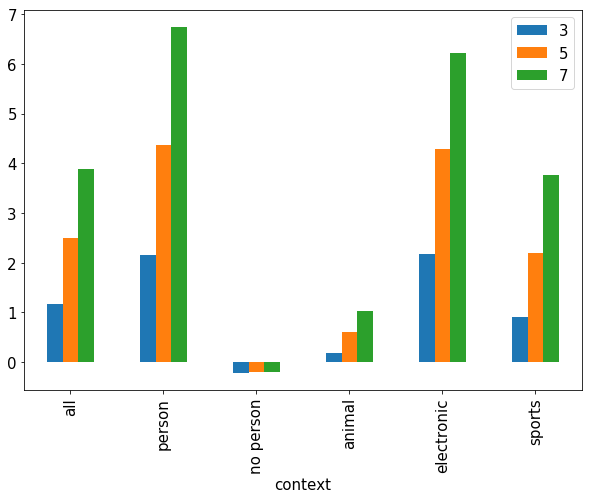

In [21]:
fig, ax = plt.subplots(figsize=(10, 7));
df.plot.bar(ax=ax);
# plt.savefig('plots/sim_aim_relerr_all.jpg', bbox_inches='tight', pad_inches=0)

Text(0, 0.5, 'NSS')

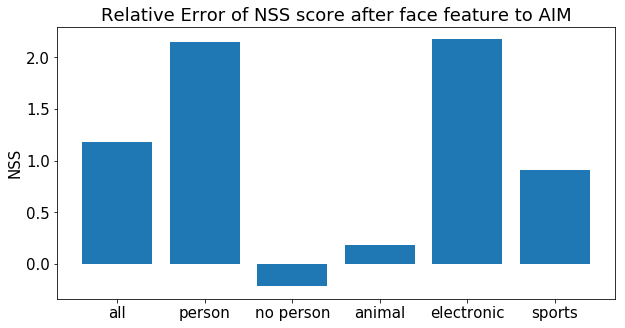

In [22]:
plt.subplots(1,1,figsize=(10,5))
plt.bar(aim_sim_f03.index, aim_sim_f03.values);
plt.title('Relative Error of NSS score after face feature to AIM');
plt.ylabel('NSS')
# plt.savefig('plots/sim_aim_relerr.jpg', bbox_inches='tight', pad_inches=0)

### "Zoom in"

In [23]:
gbvs_sim_f03 = SIM_diff_f03.transpose()['gbvs']
gbvs_sim_f05 = SIM_diff_f05.transpose()['gbvs']
gbvs_sim_f07 = SIM_diff_f07.transpose()['gbvs']

In [24]:
df_gbvs = pd.DataFrame([gbvs_sim_f03, gbvs_sim_f05, gbvs_sim_f07], index=[3,5,7])
df_gbvs = df_gbvs.transpose()

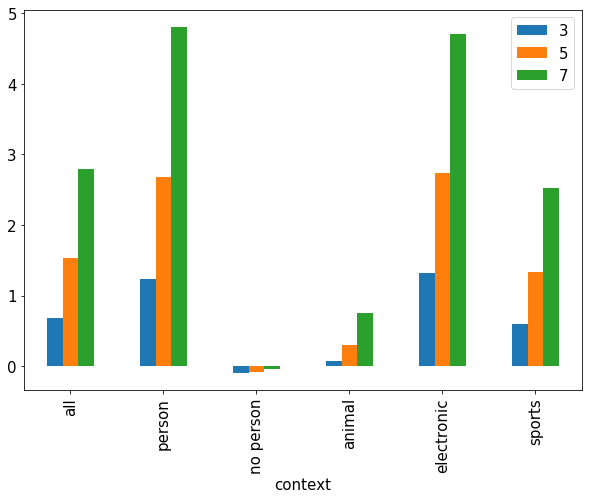

In [25]:
fig, ax = plt.subplots(figsize=(10, 7));
df_gbvs.plot.bar(ax=ax);
# plt.savefig('plots/sim_gbvs_relerr_all.jpg', bbox_inches='tight', pad_inches=0)

### Comparison between deepgaze and the best GBVS

In [26]:
gbvs_f07 = SIM_f07.transpose()['gbvs']
gbvs = SIM.transpose()['gbvs']

In [27]:
dg = SIM.transpose()['dg']
dg

context
all           0.642767
person        0.630332
no person     0.662924
animal        0.623571
electronic    0.637034
sports        0.623714
Name: dg, dtype: float64

In [28]:
df_comp = pd.DataFrame([gbvs, gbvs_f07,dg], index=['gbvs', 'gbvs_f07', 'dg'])
df_comp = df_comp.transpose()

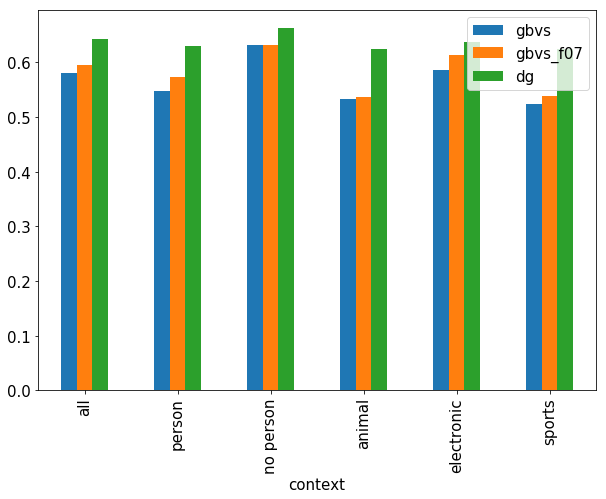

In [29]:
fig, ax = plt.subplots(figsize=(10, 7));
df_comp.plot.bar(ax=ax);
# plt.savefig('plots/sim_gbvs_vs_dg.jpg', bbox_inches='tight', pad_inches=0)

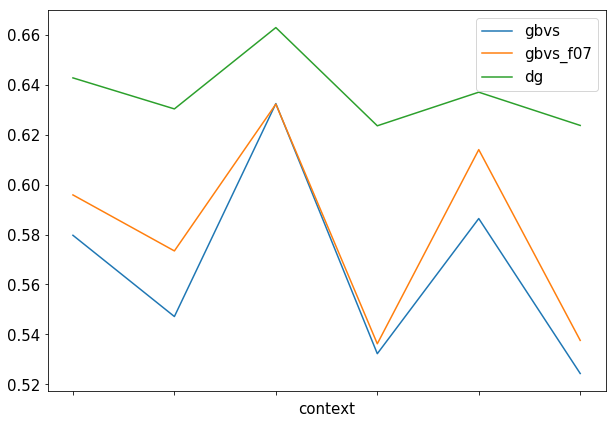

In [30]:
fig, ax = plt.subplots(figsize=(10, 7));
df_comp.plot(ax=ax);

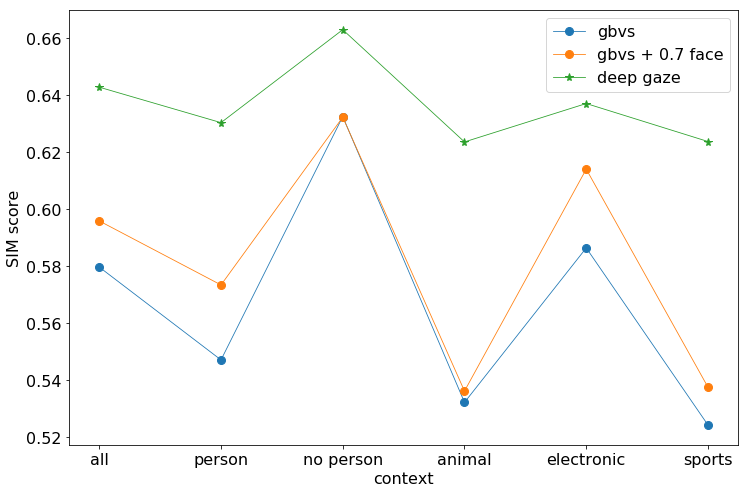

In [35]:
t = np.arange(0,6)
d = 0.8
m = 8



plt.subplots(figsize=(12,8))
plt.plot(gbvs, '-o', label='gbvs', linewidth=d, markersize=m);
plt.plot(gbvs_f07, '-o', label='gbvs + 0.7 face', linewidth=d, markersize=m);
plt.plot(dg, '-*', label='deep gaze', linewidth=d, markersize=m)



plt.ylabel('SIM score')
plt.xlabel('context')
# plt.title('Comparison of GBVS and DeepGaze performance for different contexts')
plt.legend();

plt.savefig('plots/SIM_gbvs_performance.jpg', bbox_inches='tight', pad_inches=0)